## ROC
* Receiver Operation Characteristic
* 수신자 판단 곡선 
* 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
    + 레이더 데이터를 분석하여 적 항공기와 신호 소음을 구별하는 데 사용
    + 수신기의 감도가 증가함에 따라 거짓 긍정의 수(즉, 특이성)이 감소함
* 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용
* ROC곡선의 y축은 '민감도TPR'를, x축은 '1-재현율FPR'로 그림
* 모델이 양성/긍정으로 예측했을때 얼마나 잘 맞추고 있는지를 설명한 것

## ROC 그래프 그리기
* 타이타닉 데이터셋으로 로지스틱회귀 분석한 후
* 특이도, 재현율을 구한후 ROC 그래프 작성

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
titanic = pd.read_csv('../data/titanic2b.csv')

data = titanic.iloc[:, [0,3,4,5,6,9,10,11]]
target = titanic.survived

In [4]:
X_train, X_test, ytrain, ytest = \
    train_test_split(data, target, test_size=0.3,
                     random_state=2208250945)

In [5]:
lrclf = LogisticRegression(max_iter=500)
lrclf.fit(X_train, ytrain)
pred = lrclf.predict(X_test)

In [8]:
accuracy_score(ytest, pred)

0.7857142857142857

### 분류 알고리즘 종류
* 판별함수 모형
    + 주어진 데이터를 범주category에 따라 서로 다른 영역으로 나누는 경계면decision boundary을 찾아낸 후, 이 경계면을 기준으로 데이터가 어디에 있는지를 계산하는 함수를 이용
* 확률적 판별/생성 모형 
    + 주어진 데이터에 대해 각 범주category/레이블이 정답일 조건부확률을 계산하는 방법에 따라 **조건부 확률함수를 추정**하거나 베이즈 정리를 사용해서 분류하는 모형
* 따라서, 분류기의 **예측 불확실성**을 추정하려면 scikit-learn에서 제공하는 2가지 함수를 사용
     + decision function, `predict_proba`

In [9]:
# 타이타닉 생존 예측확률 살펴보기 1
X_test[:5]

,pclass,age,sibsp,parch,fare,gender,Embarked,Titles
101,1.0,39.000000,0.0,0.0,29.7000,1,0,13
1194,3.0,29.000000,0.0,0.0,9.5000,1,2,13
1025,3.0,29.881135,0.0,0.0,8.0500,1,2,13
1032,3.0,29.881135,1.0,1.0,15.2458,1,0,9
827,3.0,16.000000,5.0,2.0,46.9000,0,2,10


In [10]:
# 판별함수 모형 : 예측값은 이산형 수치로 출력
lrclf.predict(X_test[:5])

array([1., 0., 0., 0., 0.])

In [11]:
# 타이타닉 생존 예측확률 살펴보기 2
# 확률적 판별함수 모형 : 예측값은 확률 수치로 출력
lrclf.predict_proba(X_test[:5])

array([[0.4504593 , 0.5495407 ],
       [0.91346264, 0.08653736],
       [0.91591821, 0.08408179],
       [0.83876179, 0.16123821],
       [0.64575125, 0.35424875]])

## 타이타닉 승객 생존 여부 확률값 추출

In [12]:
# 타이타닉 승객 생존 여부에서 생존이 주된 관심사이므로
# 생존에 대한 확률값만 따로 추출
pred_proba = lrclf.predict_proba(X_test)
pred_proba[:5, 1]  # 결과 중 2열만 선택

array([0.5495407 , 0.08653736, 0.08408179, 0.16123821, 0.35424875])

In [13]:
# 실제값, 확률값, 예측값을 하나의 데이터프레임에 작성
table = pd.DataFrame()
table['ytest'] = ytest
table['proba'] = pred_proba[:, 1]
table['pred'] = pred

table.head()

,ytest,proba,pred
101,0.0,0.549541,1.0
1194,1.0,0.086537,0.0
1025,0.0,0.084082,0.0
1032,1.0,0.161238,0.0
827,0.0,0.354249,0.0


In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, pred)

0.7578405017921147

In [26]:
# 각 예측값 별 특이도fprs, 민감도tprs, 임계값을 구함
# tprs : 실제값이 양성(승객 생존)이고 예측값이 양성(승객 생존)으로 예측되는 정도
# fprs : 실제값이 음성(승객 사망)인데 예측값이 양성(승객 생존)으로 예측되는 정도
# thresholds
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(ytest, pred_proba[:,1])
print('양성tprs 판단', tprs[:10])
print('음성fprs 판단', fprs[:10])

양성tprs 판단 [0.         0.00694444 0.04166667 0.04166667 0.27083333 0.27083333
 0.375      0.375      0.39583333 0.39583333]
음성fprs 판단 [0.         0.         0.         0.00403226 0.00403226 0.01209677
 0.01209677 0.01612903 0.01612903 0.02016129]


In [27]:
# 특이도,민감도,임계값을 데이터프레임에 합침
roc = pd.DataFrame()
roc['FPR'] = fprs
roc['TPR'] = tprs
roc['thresholds'] = thresholds
roc.head()

,FPR,TPR,thresholds
0,0.000000,0.000000,1.968543
1,0.000000,0.006944,0.968543
2,0.000000,0.041667,0.952354
3,0.004032,0.041667,0.947249
4,0.004032,0.270833,0.831434


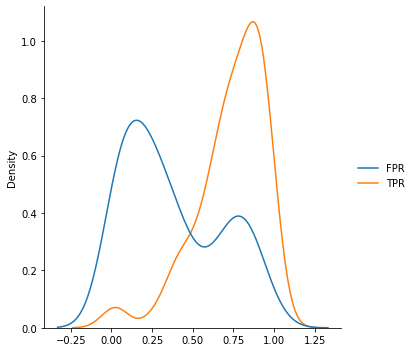

In [28]:
# 특이도fpr,민감도tpr등을 시각화
# 양성을 양성으로, 음성을 음성이라고 정확하게 분류하는지 여부 파악
# fpr, tpr 그래프의 겹친 부분이 크다 - 모델의 변별력이 낮음
# fpr, tpr 그래프의 겹친 부분이 작다 - 모델의 변별력이 높음
import seaborn as sns

sns.displot(roc.iloc[:, [0,1]], kind='kde')
plt.show()

In [16]:
# 최적 임계값 알아보기
# argmax : 가장 큰값을 지닌 요소의 index 출력
optidx = np.argmax(tprs - fprs)
opttrs = thresholds[optidx]
opttrs

0.5801774871084721

## ROC 그래프 그리기

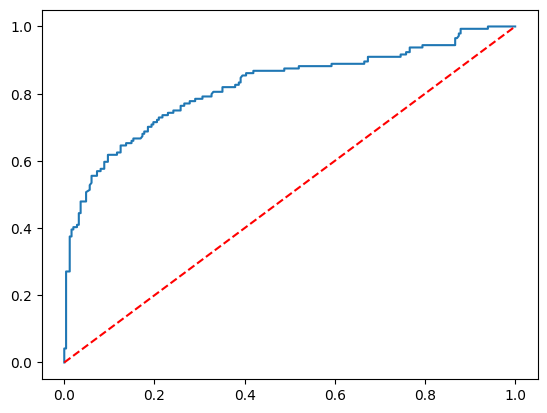

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/share/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/share/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/share/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


In [32]:
# 분류를 잘 하는 모델일수록 커브는 1에 가깝게 표시
# fpr, tpr 그래프의 겹친 부분이 크다 - 변별력이 낮음 - 곡선이 0에 가깝게 붙어서 출력
# fpr, tpr 그래프의 겹친 부분이 작다 - 변별력이 높음 - 곡선이 1에 가깝게 붙어서 출력

plt.plot(fprs, tprs)
plt.plot([0,1],[0,1], 'r--')
plt.show()

## AUC
* Area Under Curve
* ROC 곡선 밑의 면적을 구한 값
* 1에 가까울 수록 좋은 수치를 의미함
    + 0.9 ~ 1 : excellent
    + 0.8 ~ 0.9 : good
    + 0.7 ~ 0.8 : normal

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, pred)

0.7578405017921147

## iris 데이터셋을 이용한 roc, auc 분석

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

In [20]:
X_train, X_test, ytrain, ytest = \
    train_test_split(data, target, test_size=0.3,
                     random_state=2208251135)

In [21]:
lrclf = LogisticRegression(max_iter=500)
lrclf.fit(X_train, ytrain)
pred = lrclf.predict(X_test)
accuracy_score(ytest, pred)

0.9555555555555556

In [22]:
confusion_matrix(ytest, pred)

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 14]])

In [23]:
# np, pd 실수 표기법 지정
np_float = '{:.7f}'.format    # 소수점 7자리 지정
np.set_printoptions(formatter={'float_kind':np_float})
pd.options.display.float_format = lambda x : f'{x:.7f}'

In [24]:
pred_proba =  lrclf.predict_proba(X_test)
pred_proba[:5]

array([[0.0011421, 0.2159108, 0.7829471],
       [0.0805525, 0.9129857, 0.0064618],
       [0.0047264, 0.8544981, 0.1407755],
       [0.0031507, 0.7874243, 0.2094250],
       [0.0037475, 0.8058153, 0.1904372]])

In [25]:
table = pd.DataFrame()
table['ytest'] = ytest
table['proba_s'] = pred_proba[:, 0]
table['proba_vc'] = pred_proba[:, 1]
table['proba_vg'] = pred_proba[:, 2]
table['pred'] = pred

table.head()

,ytest,proba_s,proba_vc,proba_vg,pred
0,2,0.0011421,0.2159108,0.7829471,2
1,1,0.0805525,0.9129857,0.0064618,1
2,1,0.0047264,0.8544981,0.1407755,1
3,1,0.0031507,0.7874243,0.2094250,1
4,1,0.0037475,0.8058153,0.1904372,1


In [26]:
# ytest가 다중클래스(0,1,2)이므로 오류발생! => ytest는 0,1만으로 구성!
# fprs, tprs, thresholds = roc_curve(ytest, pred_proba[:,1])
# print('양성tprs 판단', tprs[:10])
# print('음성fprs 판단', fprs[:10])

In [27]:
ytest2 = table[(table.ytest == 0) | (table.ytest == 1)].ytest
ytest2.head()

1    1
2    1
3    1
4    1
6    1
Name: ytest, dtype: int64

In [28]:
pred_proba2 = table[(table.ytest == 0) | (table.ytest == 1)].proba_vc
pred_proba2.head()

1   0.9129857
2   0.8544981
3   0.7874243
4   0.8058153
6   0.9230351
Name: proba_vc, dtype: float64

In [29]:
fprs, tprs, thresholds = roc_curve(ytest2, pred_proba2)
print('버지니카tprs 판단', tprs[:10])
print('세토사fprs 판단', fprs[:10])

버지니카tprs 판단 [0.0000000 0.0625000 1.0000000 1.0000000]
세토사fprs 판단 [0.0000000 0.0000000 0.0000000 1.0000000]


In [30]:
roc = pd.DataFrame()
roc['FPR'] = fprs
roc['TPR'] = tprs
roc['thresholds'] = thresholds
roc.head()

,FPR,TPR,thresholds
0,0.0000000,0.0000000,1.9372236
1,0.0000000,0.0625000,0.9372236
2,0.0000000,1.0000000,0.4085343
3,1.0000000,1.0000000,0.0142306


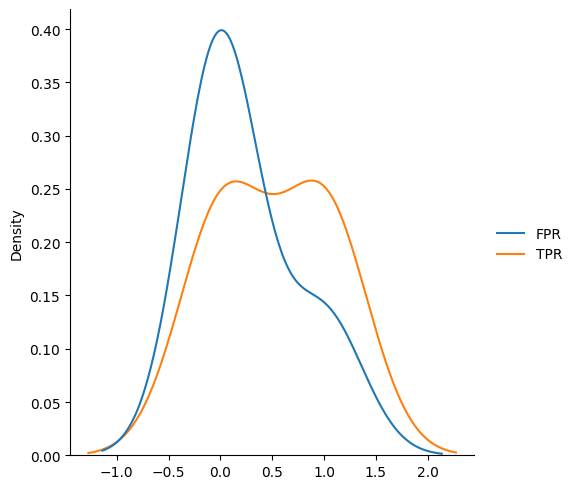

In [31]:
sns.displot(roc.iloc[:, [0,1]], kind="kde")
plt.show()

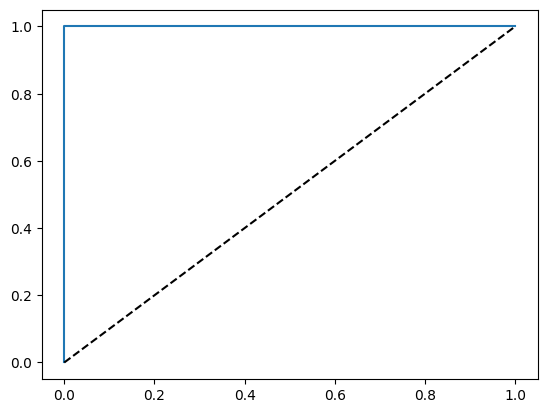

In [32]:
plt.plot(fprs, tprs)
plt.plot([0,1],[0,1], 'k--')
plt.show()

In [33]:
pred2 = table[(table.ytest == 0) | (table.ytest == 1)].pred
roc_auc_score(ytest2, pred2)

1.0